In [1]:
%pylab inline
import PCF
from astropy.table import Table

Populating the interactive namespace from numpy and matplotlib


In [7]:
calc = PCF.RSD_2PCF(Om0=0.3089)
#pathR = "/Users/rpaviot/Downloads/EZmock/dat/dat/EZmock_complete_eBOSS_LRGpCMASS_SGC.ran.fits.gz"
pathR = "/Users/rpaviot/Downloads/EZmock/dat/EZmock_complete_eBOSS_ELG_SGC.ran.fits.gz"

T = Table.read(pathR)
bounds = np.array([-43.77751845,54.85123515,-11.00146648,5.83361772])
ra_r =T['RA']
dec_r = T['DEC']
z_r = T['Z']
w_r = T['WEIGHT_FKP']
condang = ra_r > 180
ra_r[condang]=ra_r[condang]-360
condr =  np.where((ra_r > bounds[0]) & (ra_r < bounds[1]) & (dec_r > bounds[2]) & (dec_r < bounds[3]))
ra_r = ra_r[condr]
dec_r = dec_r[condr]
w_r = w_r[condr]
z_r = z_r[condr]
condang = ra_r < 0
ra_r[condang]=ra_r[condang]+360

rows = np.random.choice(len(ra_r), int(len(ra_r)/2), replace=False)
ra_r = ra_r[rows].astype('float64')
dec_r = dec_r[rows].astype('float64')
z_r = z_r[rows].astype('float64')
w_r = w_r[rows].astype('float64')
binsfile_rp = np.geomspace(0.2,50,13)
binsfile_s = np.geomspace(1,50,10)

calc.set_random(RA_r=ra_r,DEC_r=dec_r,Z_r=z_r,W_r=w_r)
#calc.precompute_RR_smu(binsfile_s)
calc.precompute_RR_rppi(binsfile_rp,pimax=80)

In [13]:
binsfile_s

array([ 1.        ,  1.5444521 ,  2.3853323 ,  3.6840315 ,  5.6898102 ,
        8.78763934, 13.57208808, 20.96144001, 32.37394014, 50.        ])

In [16]:
binsfiles

array([ 1.        ,  1.5760586 ,  2.48396071,  3.91486764,  6.17006081,
        9.72437741, 15.32618865, 24.15497143, 38.06965045, 60.        ])

In [8]:
path = "/Users/rpaviot/Downloads/EZmock/dat/"

for i in range(1,101):
    files = "/Users/rpaviot/Downloads/EZmock/dat/EZmock_complete_eBOSS_ELG_SGC_{}.dat.fits.gz".format(str(i).zfill(4))
    #files = "/Users/rpaviot/Downloads/EZmock/dat/dat/EZmock_complete_eBOSS_LRGpCMASS_SGC_{}.dat.fits.gz".format(str(i).zfill(4))
    T = Table.read(files)
    ra =T['RA']
    dec = T['DEC']
    z = T['Z']
    w = T['WEIGHT_FKP']
    condang = ra > 180
    ra[condang]=ra[condang]-360
    condr =  np.where((ra > bounds[0]) & (ra < bounds[1]) & (dec > bounds[2]) & (dec< bounds[3]))
    ra = ra[condr]
    dec = dec[condr]
    w = w[condr]
    z = z[condr]
    condang = ra < 0
    ra[condang]=ra[condang]+360
    ra = ra.astype('float64')
    dec = dec.astype('float64')
    z = z.astype('float64')
    w = w.astype('float64')
    calc.set_data(RA=ra,DEC=dec,Z=z,W=w)
    #r,e0,e2,e4 = calc.compute(binsfile_s)
    rp,wp = calc.compute_wp(binsfile_rp,80)
    #fileout = "/Users/rpaviot/Downloads/EZmock/dat/dat/xil_EZmock_eBOSSpCMASS_SGC_{}.dat".format(i+1)
    fileout2 = "/Users/rpaviot/Downloads/EZmock/dat/wp_EZmock_ELG_SGC_{}.dat".format(i)
    #np.savetxt(fileout,np.transpose([r,e0,e2,e4]))
    np.savetxt(fileout2,np.transpose([rp,wp]))

DD computation done
DR computation done
DD computation done
DR computation done
DD computation done
DR computation done
DD computation done
DR computation done
DD computation done
DR computation done
DD computation done
DR computation done
DD computation done
DR computation done
DD computation done
DR computation done
DD computation done
DR computation done
DD computation done
DR computation done
DD computation done
DR computation done
DD computation done
DR computation done
DD computation done
DR computation done
DD computation done
DR computation done
DD computation done
DR computation done
DD computation done
DR computation done
DD computation done
DR computation done
DD computation done
DR computation done
DD computation done
DR computation done
DD computation done
DR computation done
DD computation done
DR computation done
DD computation done
DR computation done
DD computation done
DR computation done
DD computation done
DR computation done
DD computation done
DR computation done


In [25]:
print(r)

[ 1.2880293   2.03000966  3.19941418  5.04246423  7.94721911 12.52528303
 19.74058004 31.11231094 49.03482523]


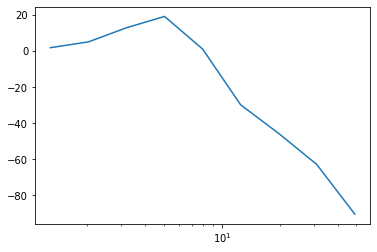

In [22]:
plt.semilogx(r,e2*r**2)

In [7]:
print(r)

[ 0.28846716  0.54366588  1.02463167  1.93109424  3.63947855  6.859222
 12.92738117 24.36386864 45.91789222]


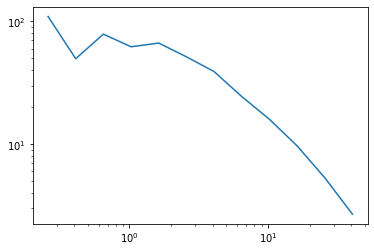

In [11]:
plt.loglog(rp,2*wp)

In [2]:
B = np.zeros((12,100))

for i in range(0,100):
    #filename = './../xi_EZ_mocks/multipoles_rsd/xil_{}.txt'.format(str(i).zfill(3))
    #filename = "/data/data/EZmock_v7/pairscounts/xil_eboss_ELG_latest_{}_5mpc.mul".format(i+1)
    #fileout = "/Users/rpaviot/Downloads/EZmock/dat/dat/xil_EZmock_eBOSSpCMASS_SGC_{}.dat".format(i+1)
    fileout = "/Users/rpaviot/Downloads/EZmock/dat/wp_EZmock_ELG_SGC_{}.dat".format(i+1)
    rp,wp = np.loadtxt(fileout,unpack=True)
    wp = 2*wp
    B[:,i] = wp
    
    
Cij = np.cov(B)
wpm = np.mean(B,axis=1)


In [5]:
np.savetxt("Cov_ELG_SGC.dat",Cij)

In [3]:
err = np.sqrt(np.diag(Cij))

<ErrorbarContainer object of 3 artists>

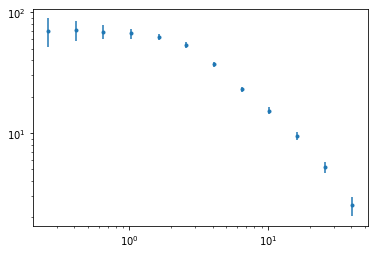

In [4]:
plt.xscale('log')
plt.yscale('log')
plt.errorbar(rp,wpm,yerr=err,fmt=".")